# Bot Entities

(at long last)

Import our libraries needed for the data handling.

In [1]:
import pandas as pd
import numpy as np
import json
import glob

In [2]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

Libraries for stupid text encoding

In [3]:
from urllib2 import quote
# Unicode strings
from __future__ import unicode_literals

Import libraries needed for visualization.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
# Within notebook viewing
%matplotlib inline

print (matplotlib.__version__)

1.5.3


In [5]:
# Import for axes, color, etc
from pylab import *

### Directories

In [6]:
testDir = '../../data/external/trump-bots/'
botDir = '../../data/external/botresults/'
outDir = '../../data/processed/bot-tweets/'

Read in the data files by combining the extracted files.

In [7]:
# Crudely combine
process = []
for f in glob.glob((botDir + "*.txt")):
    with open(f, "rb") as infile:
        for line in infile:
            process.append(json.loads(line))
raw = pd.DataFrame.from_records(process)

# save memory
del process

print ("(# tweets, # columns): {}".format(raw.shape))

(# tweets, # columns): (77722, 33)


In [8]:
# Helper functions
def countEntities(df, col):
    '''
    Function to aggregate entities from tweets.
    Returns a dataframe with value counts
    '''
    # Hold the entities
    ent_list = []
    
    # assign the appropriate key to get info
    cols = {
        'hashtags': 'text',
        'urls': 'expanded_url',
        'user_mentions': 'screen_name'
    }
    
    def iterEnt(l):
        '''
        Function to keep your sanity. Checks if the entry is null,
        adds values to our list if it isn't.
        '''
        if (l is not None):
            for ent in l:
                try:
                    val = cols[col]
                    if ent[val] is not None:
                        escaped = ent[val].lower().encode('utf-8')
                        ent_list.append(escaped)
                except:
                    print (ent)
    
    df.apply(lambda x: iterEnt(x[col]), axis=1)
    # Create a dataframe, and then aggregate
    counts = pd.DataFrame(pd.Series(ent_list).value_counts())
    counts.reset_index(drop=False, inplace=True)

    # Give it a column
    counts.columns = [col, 'frequency']
    return counts

def countHashtags(tweet):
    try:
        if tweet['hashtags'] is not None:
            return len(tweet['hashtags'])
    except:
        return 0

Extract only the entities. This contains a tweet's hashtags (*#'s*), *URLs*, and user mentions (*@'s*).

In [9]:
# content from tweets
entities = pd.DataFrame.from_records(raw['entities'])    
# Calculate the number of hashtags in a tweet
entities['hashtag_count'] = entities.apply(lambda x: countHashtags(x), axis=1)

print (entities['hashtags'].iloc[3])
entities.head()

[{u'indices': [0, 13], u'text': u'ModiMinistry'}]


,hashtags,media,symbols,trends,urls,user_mentions,hashtag_count
0,[],NaN,[],[],"[{u'url': u'http://t.co/uvF94Se7N1', u'indices...",[],0
1,[],NaN,[],[],"[{u'url': u'http://t.co/BXCXee3Ra1', u'indices...",[],0
2,[],NaN,[],[],"[{u'url': u'http://t.co/wfUA1uJWOh', u'indices...",[],0
3,"[{u'indices': [0, 13], u'text': u'ModiMinistry'}]",NaN,[],[],"[{u'url': u'http://t.co/MyrrJb1Ex8', u'indices...",[],1
4,[],NaN,[],[],"[{u'url': u'http://t.co/XF3TWcmQEl', u'indices...",[],0


### Hashtags

What are the most common hashtags? Summary statistics below.

In [10]:
# Overall bot tweets
print ('Descriptive stats for hashtag counts')
print (entities['hashtag_count'].describe())
print ('\n---\n...for tweets with at least 1 hashtag')
print (entities[entities['hashtag_count'] > 0].describe())

Descriptive stats for hashtag counts
count    77722.000000
mean         0.899050
std          1.430082
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: hashtag_count, dtype: float64

---
...for tweets with at least 1 hashtag
       hashtag_count
count   36897.000000
mean        1.893813
std         1.556955
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        19.000000


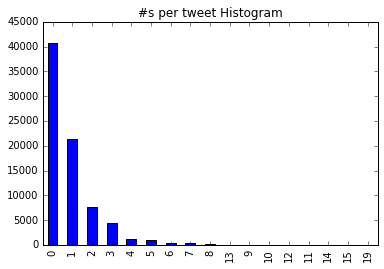

In [11]:
# #'s per tweet distribution
entities['hashtag_count'].value_counts().plot(kind='bar', title='#s per tweet Histogram')

In [12]:
hashtags = countEntities(entities, 'hashtags')
print (hashtags.head(50))

                 hashtags  frequency
0               trump2016       7867
1                   trump       5280
2                 clinton       5019
3             thenewsclub       4883
4             donaldtrump       3451
5                redstate       2609
6        boycottstarbucks       2495
7              trumptrain       2194
8            hillarytapes       1839
9                    news       1400
10        microaggression       1362
11                     ca       1108
12        realdonaldtrump        847
13  makeamericagreatagain        815
14                    gop        733
15                     pa        695
16                     ny        693
17           modiministry        628
18                     in        617
19              teamtrump        517
20                   tcot        506
21                   maga        403
22                     ct        379
23                  world        377
24                     az        367
25                     md        350
2

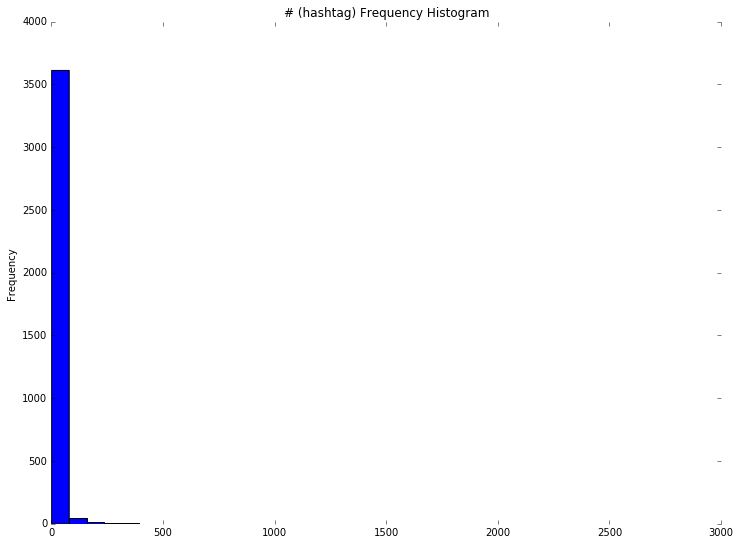

In [13]:
# Distribution of frequencies

# Create a figure of given size
fig = plt.figure(figsize=(12,9))
# Add a subplot
ax = fig.add_subplot(111)
# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)

# limit axis so we can see more
matplotlib.pylab.xlim([0, 3000])


hashtags['frequency'].plot(kind='hist', bins=100, title='# (hashtag) Frequency Histogram')

ValueError: could not convert string to float: trumptrain

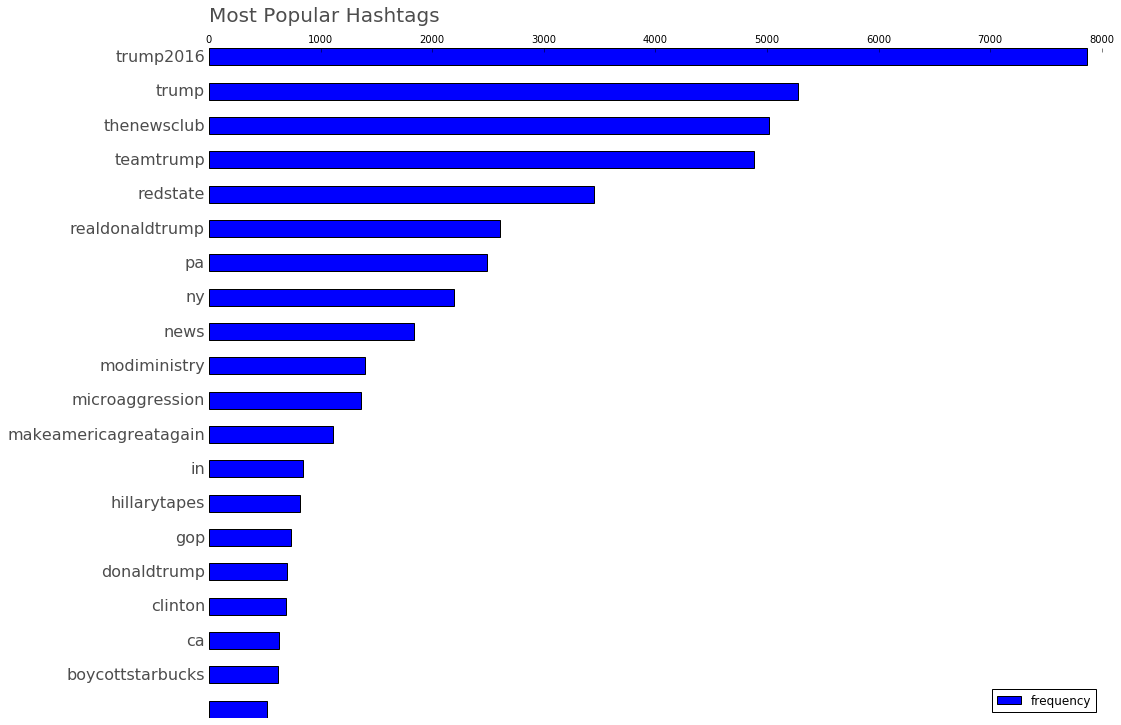

In [22]:
# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)

# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
ax.set_xlabel('Most Popular Hashtags', fontsize=20, alpha=0.7, ha='left')
# Position x tick labels on top
ax.xaxis.tick_top()
# A little above the axis
ax.xaxis.set_label_coords(0, 1.04)


def ord_to_char(v, p=None):
    return chr(int(v))

ax.yaxis.set_major_formatter(FuncFormatter(ord_to_char))
ax.yaxis.set_major_locator(MultipleLocator(1))

# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')


# Y ticks
# # for whatever reason 'trumptrain' raises: 
# # # ValueError: could not convert string to float: trumptrain
hashtags['hashtags'].iloc[7] = u'trumptrain'

yticks = [i.encode('unicode-escape') for i in hashtags['hashtags'].head(20).sort_values().tolist()]
ax.yaxis.set_ticks([x + 1 for x in range(21)])
ax.set_yticklabels(yticks, fontsize=16, alpha=0.7)

hashtags.head(20).sort_values('frequency').plot(kind='barh', ax=ax, align='center', yticks=hashtags['hashtags'].head(20), y='frequency')

### URLs

In [15]:
urls = countEntities(entities, 'urls')
urls.head(50)

,urls,frequency
0,http://cnnpolitics.com,2535
1,http://cnn.it/20ndgad,2494
2,http://growapair.gq,1362
3,http://bit.ly/1rcvg6d,807
4,http://ift.tt/1jjvmta,760
5,http://on.fb.me/1l1mvpu,749
6,http://ift.tt/1h21yzd,565
7,http://ift.tt/1kfdkrh,432
8,http://www.apple.co/1h1p4do,309
9,https://youtu.be/gw8c2cq-vpg,301


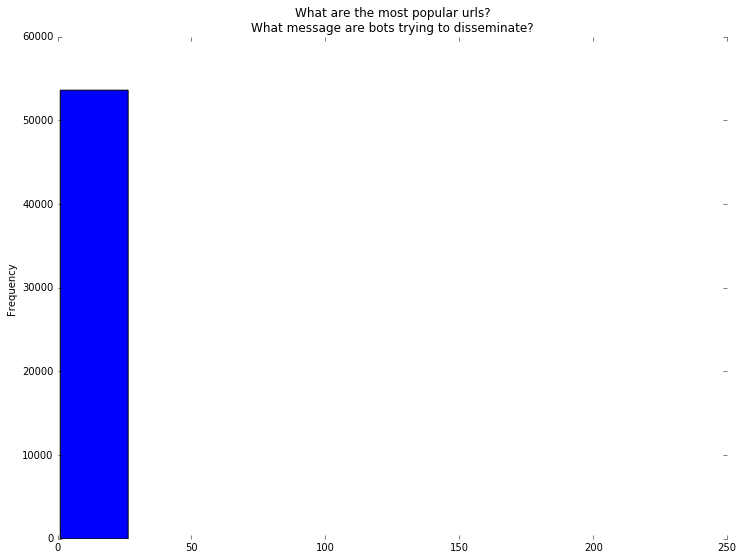

In [16]:
# # distribution of links

# Create a figure and subploy
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

# Formatting
ax.grid(False)
ax.set_frame_on(False)

# limit axis so we can see more
matplotlib.pylab.xlim([0, 250])

urls['frequency'].plot(kind='hist', bins=100,
                       title='What are the most popular urls?\nWhat message are bots trying to disseminate?')

### Users

In [23]:
users = countEntities(entities, 'user_mentions')
users.head(50)

,user_mentions,frequency
0,realdonaldtrump,1411
1,youtube,657
2,samstwitch,538
3,wesleyrickard,522
4,californiagop45,509
5,lindasuhler,379
6,cnnpolitics,336
7,realcalvinhobbs,261
8,stylishrentals,255
9,danscavino,199


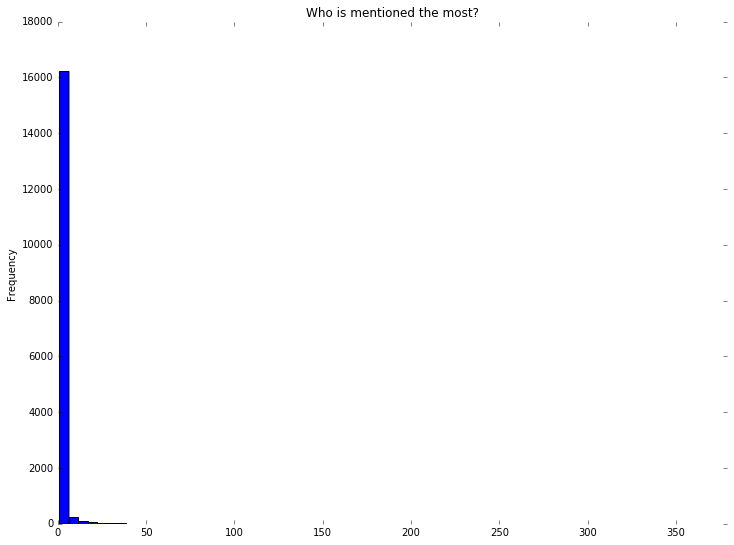

In [24]:
# # distribution of users

# Create a figure and subploy
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

# Formatting
ax.grid(False)
ax.set_frame_on(False)

# limit axis so we can see more
matplotlib.pylab.xlim([0, users['frequency'].iloc[5:].max()])

# use iloc to skip first two (donaldtrump and youtube)
users['frequency'].iloc[2:].plot(kind='hist', bins=100,
                       title='Who is mentioned the most?')

In [ ]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh